<a href="https://colab.research.google.com/github/merazAfridi/Euro-USD-Exchange-Rate-Prediction/blob/main/Euro_USD_Exchange_Rate_Final_498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
#ML model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.svm import SVR
# model evaluation
from sklearn.metrics import accuracy_score,roc_auc_score

# **Data Collection and Processing**

In [69]:
from google.colab import drive
drive.mount('/content/drive')
# loading the csv data
data = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Dataset/Gold Price CSE499 Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# print first 5 rows
data.head()

,Date,SPX,GLD,SLV,EUR/USD
0,2/1/1980,105.76,559.5,39.95,1.5149
1,3/1/1980,105.22,634.0,37.00,1.5177
2,4/1/1980,106.52,588.0,32.75,1.5129
3,7/1/1980,106.81,633.5,39.00,1.5168
4,8/1/1980,108.95,610.0,33.52,1.5108


In [71]:
#last 5 rows
data.tail()

,Date,SPX,GLD,SLV,EUR/USD
10577,3/24/2023,3970.99,1978.2000,23.2204,1.0780
10578,3/27/2023,3977.53,1956.5783,23.0129,1.0799
10579,3/28/2023,3971.27,1971.9989,23.3344,1.0842
10580,3/29/2023,4027.81,1962.9123,23.3034,1.0845
10581,3/30/2023,4050.83,1978.4419,23.8752,1.0905


# **Data Exploration and Visualization**

In [72]:
#Convert the 'Date' column to datetime objects

data['Date'] = pd.to_datetime(data['Date'])

In [73]:
# number of rows and columns
data.shape

(10582, 5)

In [74]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10582 non-null  datetime64[ns]
 1   SPX      10581 non-null  float64       
 2   GLD      10398 non-null  float64       
 3   SLV      10573 non-null  float64       
 4   EUR/USD  10550 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 413.5 KB


In [75]:
#checking the number of missing values
data.isnull().sum()

Date         0
SPX          1
GLD        184
SLV          9
EUR/USD     32
dtype: int64

In [76]:
# statistical measures of the data
data.describe()

,Date,SPX,GLD,SLV,EUR/USD
count,10582,10581.000000,10398.000000,10573.000000,10550.000000
mean,2001-04-03 00:26:40.302400256,1201.387682,481.647612,11.383250,1.159294
min,1980-01-02 00:00:00,98.220000,70.000000,3.548000,0.644400
25%,1990-06-21 06:00:00,342.150000,273.000000,5.173000,1.073700
50%,2000-12-05 12:00:00,1066.109985,366.400000,7.504000,1.167900
75%,2011-12-20 18:00:00,1462.420044,438.437500,16.000000,1.273434
max,2023-12-01 00:00:00,4796.560000,2998.000000,49.450000,1.598798
std,NaN,1061.553355,454.009940,7.887263,0.169976


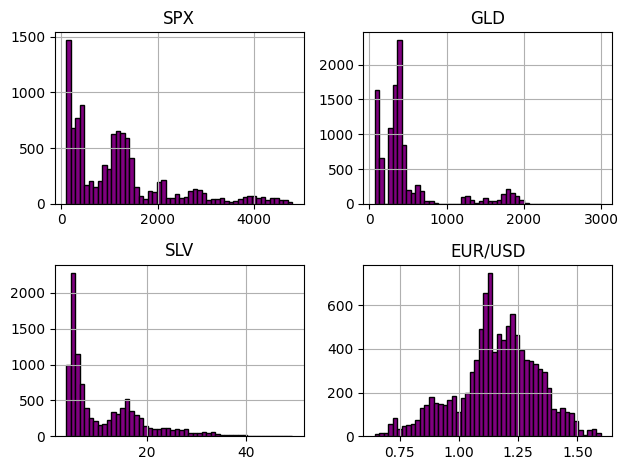

In [77]:
#data frequency
data.hist(column=data.columns[1:], color='purple', edgecolor='black', bins=50)
plt.tight_layout()
plt.show()


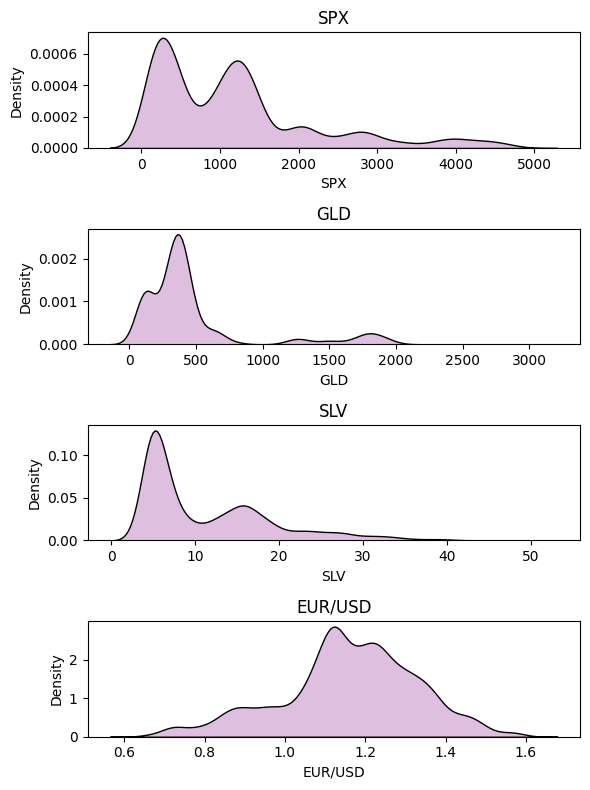

In [78]:
#Data density
import seaborn as sns
import matplotlib.pyplot as plt

#select columns excluding "Date"
cols = data.columns[1:]

#create a figure with subplots
fig, axes = plt.subplots(nrows=len(cols), figsize=(6, 8))
#plot KDE
for i, col in enumerate(cols):
    sns.kdeplot(data[col], ax=axes[i], color='purple', edgecolor='black', fill=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

**Outlier Detection and Removal**

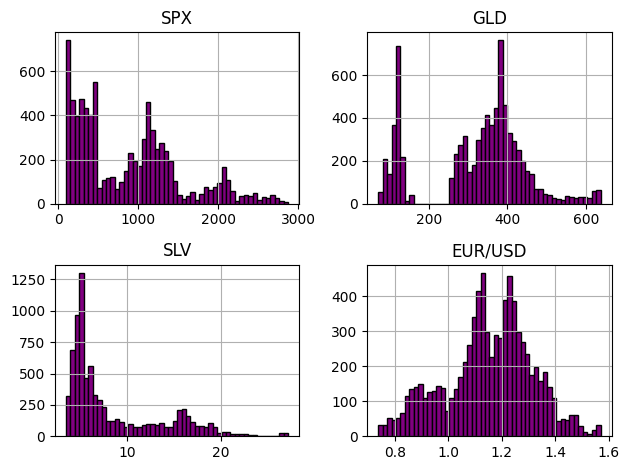

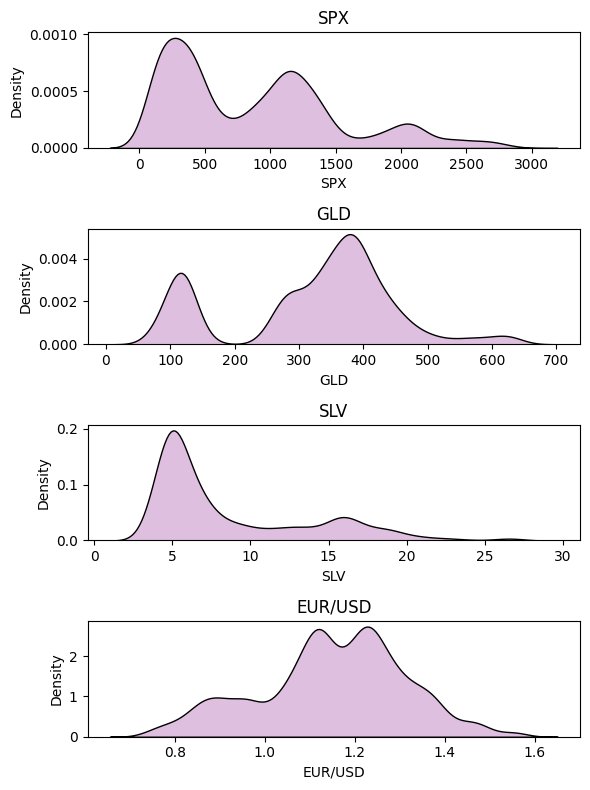

In [79]:
#detect outliers using the interquartile range(IQR)
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

#remove outliers
data = remove_outliers(data, cols)

#plotting data again to show the effect of outlier removal
data.hist(column=cols, color='purple', edgecolor='black', bins=50)
plt.tight_layout()
plt.show()

# Plot the data density again to show the effect of outlier removal
fig, axes = plt.subplots(nrows=len(cols), figsize=(6, 8))
for i, col in enumerate(cols):
  sns.kdeplot(data[col], ax=axes[i], color='purple', edgecolor='black', fill=True)
  axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [80]:
#New data shape
data.shape

(8108, 5)

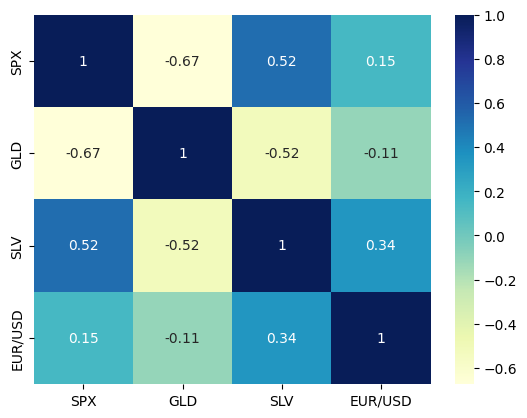

In [83]:
#select columns excluding "Date"
cols = data.columns[1:]

#corr matrix
corr = data[cols].corr()

#heatmap of the corr matrix
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

SPX    0.148671
GLD   -0.110295
SLV    0.342826
Name: EUR/USD, dtype: float64


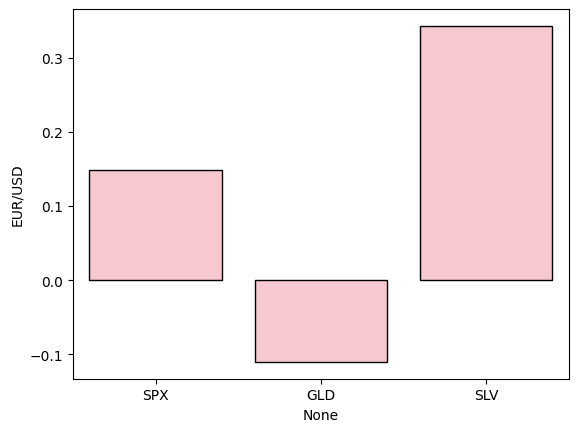

In [130]:
#corr values of EUR/USD
corr_eur_usd = corr['EUR/USD'].drop('EUR/USD')
print(corr_eur_usd)

sns.barplot(x=corr_eur_usd.index, color='pink', edgecolor='black', y=corr_eur_usd)
plt.show()

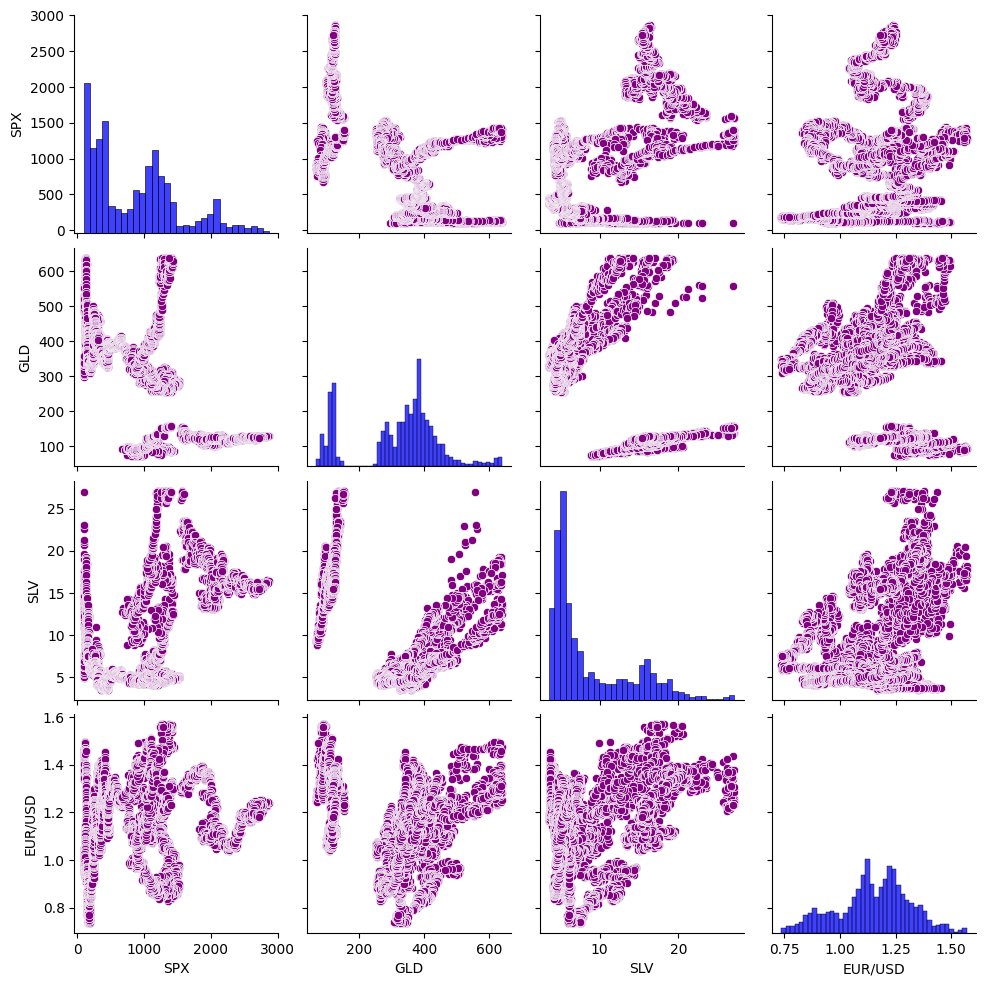

In [158]:
#pairwise relationships
sns.pairplot(data=data, x_vars=cols, y_vars=cols, kind='scatter', plot_kws={'color':'purple'}, diag_kws={'color':'blue'})
plt.show()